# Creating a predictive model from a Stanford Sentiment Tree Bank Dataset after creating model applying prediction in amazone Reviews dataset.

In [1]:
# importing usefull libraries 
import pandas as pd
import numpy as np
import os
import re
import string
from nltk.tokenize import word_tokenize
# nltk
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

c:\users\nilesh verma\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# IMPORTING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
# IMPORTING SCORING PARAMETERS
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, accuracy_score,matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [3]:
#importing sentiment data
data = pd.read_csv('Sentiment_data.csv')

In [4]:
data

,Sentence,Sentiment_Values,Sentiment
0,The Rock is destined to be the 21st Century 's...,0.69444,Positive
1,The gorgeously elaborate continuation of `` Th...,0.83333,Very Positive
2,Singer\/composer Bryan Adams contributes a sle...,0.62500,Positive
3,You 'd think by now America would have had eno...,0.50000,Netural
4,Yet the act is still charming here .,0.72222,Positive
...,...,...,...
181316,it seems to me the film is about the art of ri...,0.29167,Negative
181317,It 's just disappointingly superficial -- a mo...,0.33333,Negative
181318,The title not only describes its main characte...,0.23611,Negative
181319,Sometimes it feels as if it might have been ma...,0.44444,Netural


In [5]:
data.Sentiment.value_counts()

Netural          89335
Positive         38438
Negative         32547
Very Positive    11723
Very Negative     9278
Name: Sentiment, dtype: int64

## Some EDA are performes in a middel of a notebooks

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Sentences')

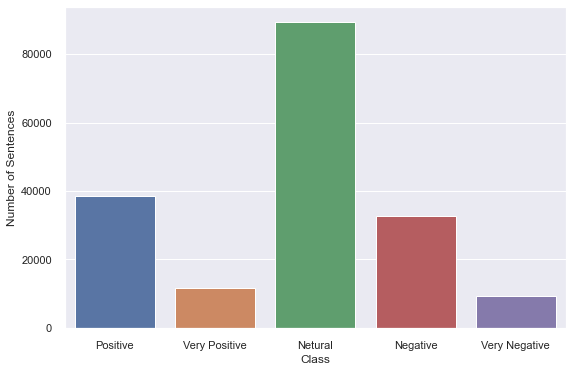

In [7]:
# plotting graphs for EDA (sentiments counts)
sns.set(style="darkgrid")
total = len(data)*1.
ax = sns.countplot(x="Sentiment", data=data)
plt.xlabel('Class')
plt.ylabel('Number of Sentences')

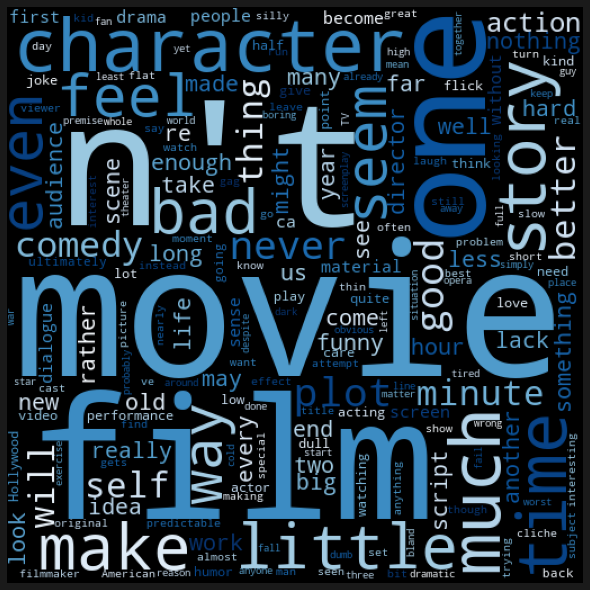

Wall time: 1.13 s


In [8]:
%%time
# ploting a world cloud for nagative worlds in a sentences 
Negative_words = ' '.join(list(data[data['Sentiment'] == 'Negative']['Sentence']))
Negative_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Negative_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Negative_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

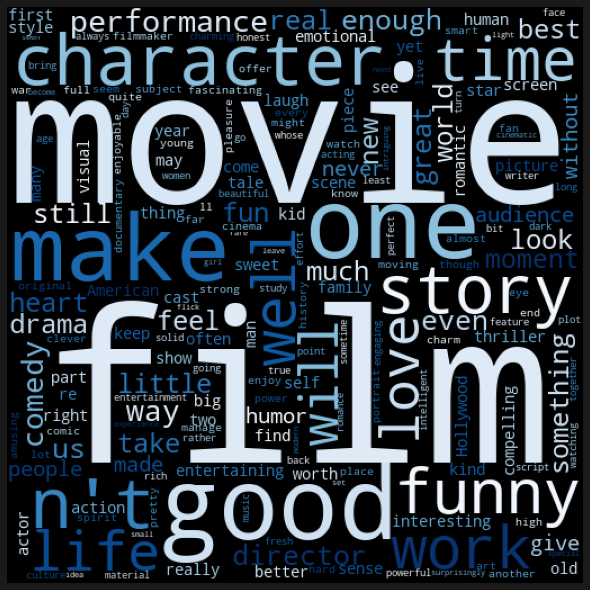

Wall time: 1.17 s


In [9]:
%%time
# ploting a world cloud for Postive worlds in a sentences 
Positive_words = ' '.join(list(data[data['Sentiment'] == 'Positive']['Sentence']))
Positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Positive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

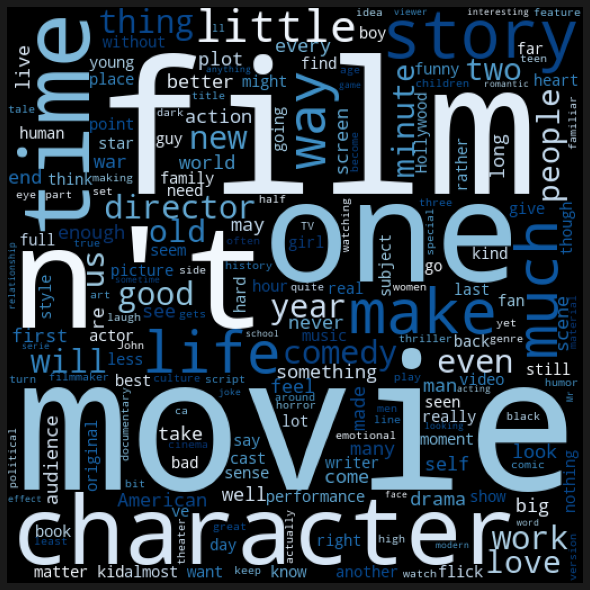

Wall time: 1.37 s


In [10]:
%%time
# ploting a world cloud for Netural worlds in a sentences 
Netural_words = ' '.join(list(data[data['Sentiment'] == 'Netural']['Sentence']))
Netural_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Netural_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Netural_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Text Data Prepeocessing 
We just removed the extra things to normlized our text data for batter perfomence in our model.

In [11]:
%%time
# Text-preprocessing
print(">>>>>Text-preprocessing<<<<<")
print("========START=========")
# Missing Values
num_missing_desc = data.isnull().sum()[2]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
data = data.dropna()
print("Drop NULL values : Done")

TAG_CLEANING_RE = "@\S+"
# Remove @tags
data['Sentence'] = data['Sentence'].map(lambda x: re.sub(TAG_CLEANING_RE, ' ', x))
print("Remove @tags : Done")

# Smart lowercase
data['Sentence'] = data['Sentence'].map(lambda x: x.lower())
print("Smart lowercase : Done")

# Remove numbers
data['Sentence'] = data['Sentence'].map(lambda x: re.sub(r'\d+', ' ', x))
print("Remove numbers : Done")

# Remove links
TEXT_CLEANING_RE = "https?:\S+|http?:\S|[^A-Za-z0-9]+"
data['Sentence'] = data['Sentence'].map(lambda x: re.sub(TEXT_CLEANING_RE, ' ', x))
print("Remove links : Done")

# Remove Punctuation
data['Sentence']  = data['Sentence'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
print("Remove Punctuation : Done")

# Remove white spaces
data['Sentence'] = data['Sentence'].map(lambda x: x.strip())
print("Remove white spaces : Done")

# Tokenize into words
data['Sentence'] = data['Sentence'].map(lambda x: word_tokenize(x))
print("Tokenize into words : Done")
 
# Remove non alphabetic tokens
data['Sentence'] = data['Sentence'].map(lambda x: [word for word in x if word.isalpha()])
print("Remove non alphabetic tokens : Done")

# Filter out stop words
stop_words = set(stopwords.words('english'))
data['Sentence'] = data['Sentence'].map(lambda x: [w for w in x if not w in stop_words])
print("Filter out stop words : Done")
    
# Word Lemmatization
lem = WordNetLemmatizer()
data['Sentence'] = data['Sentence'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
print("Word Lemmatization : Done")

# Turn lists back to string
data['Sentence'] = data['Sentence'].map(lambda x: ' '.join(x))
print("Turn lists back to string : Done")

print("========END=========")

>>>>>Text-preprocessing<<<<<
========START=========
Number of missing values: 0
Drop NULL values : Done
Remove @tags : Done
Smart lowercase : Done
Remove numbers : Done
Remove links : Done
Remove Punctuation : Done
Remove white spaces : Done
Tokenize into words : Done
Remove non alphabetic tokens : Done
Filter out stop words : Done
Word Lemmatization : Done
Turn lists back to string : Done
========END=========
Wall time: 20.1 s


In [12]:
data.head(20)

,Sentence,Sentiment_Values,Sentiment
0,rock destine st century new conan go make spla...,0.69444,Positive
1,gorgeously elaborate continuation lord ring tr...,0.83333,Very Positive
2,singer composer bryan adams contribute slew so...,0.62500,Positive
3,think america would enough plucky british ecce...,0.50000,Netural
4,yet act still charm,0.72222,Positive
5,whether enlighten derrida lecture self derrida...,0.83333,Very Positive
6,labour involve create layer richness imagery c...,0.87500,Very Positive
7,part charm satin rouge avoid obvious humour li...,0.72222,Positive
8,screenplay ingeniously construct memento,0.83333,Very Positive
9,extreme ops exceed expectations,0.73611,Positive


# Features Extraction from text data

In [13]:
#split the data to the X(Sentences) and Y(target sentiments) form
X_train = data['Sentence']
y_train = data['Sentiment']

In [14]:
pd.value_counts(y_train)

Netural          89335
Positive         38438
Negative         32547
Very Positive    11723
Very Negative     9278
Name: Sentiment, dtype: int64

In [15]:
# our labels are in form of strings but models only tack numerical values thats why we encoded in a numbers
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [16]:
y_train = label_encoder.fit_transform(y_train) 
y_train

array([2, 4, 2, ..., 0, 1, 0])

### Using TF-IDF vectore for a features exstraction.

In [17]:
%%time
vect = TfidfVectorizer(ngram_range=(1,1),stop_words='english').fit(X_train)
X_train.text_vectorized = vect.transform(X_train)

Wall time: 1.92 s


In [18]:
print("Length of Vocabulary:", len(vect.vocabulary_))
print("Shape of Train Data:", X_train.text_vectorized.shape)

Length of Vocabulary: 14165
Shape of Train Data: (181321, 14165)


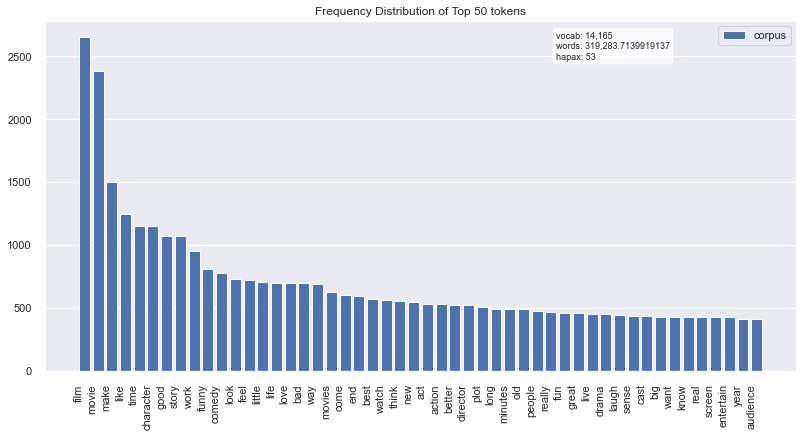

In [19]:
# generating frequency distribution of text accourding to there values counts
features   = vect.get_feature_names()
fig, ax = plt.subplots(figsize=(12,6))
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(X_train.text_vectorized)
visualizer.show()

# Model Buliding
In here we performe K-Fold cross validation with a diffrent model a choose best model for sentiment classification. our main mesurment unit is a Accurecy for this model building processs.

In [20]:
# vOTING cLASSIFIRE
clf1 = LogisticRegression(C = 1.1,random_state=0,solver='saga')
clf2 = SGDClassifier(loss='log',max_iter=1, tol=1e-1)
eclf1 = VotingClassifier(estimators=[('lr', clf1),('sg',clf2)],voting ='soft')

In [21]:
clf = {
"MultinomialNB": MultinomialNB(alpha = 0.5),
"SGDClassifier": SGDClassifier(loss='log',max_iter=10, tol=1e-3),
"LogisticRegression": LogisticRegression(C = 1.1,random_state=0,solver='saga'),
"BernoulliNB": BernoulliNB(),
"RidgeClassifier":RidgeClassifier(alpha=1.1,normalize=True,max_iter=100,class_weight="balanced",solver='auto',random_state=0),
"RandomForestClassifier":RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
"PassiveAggressiveClassifier":PassiveAggressiveClassifier(),
"Perceptron":Perceptron(tol=1e-3, random_state=0),
"Ensemble_Voting_Model":eclf1,
"LinearSVC":LinearSVC(class_weight='balanced',random_state=0,C=1.1,max_iter=100)
}

In [22]:
%%time
result = []
m = []
for name, model in clf.items():
    scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity/recall': make_scorer(recall_score,average = 'macro'),
    'specificity': make_scorer(recall_score,pos_label=0,average = 'weighted'),
     'precision': make_scorer(precision_score,average = 'macro'),
     'f1':make_scorer(f1_score,average = 'macro'),
     #'roc_auc':make_scorer(roc_auc_score, multi_class="ovr"),
    #'Mcc':make_scorer(matthews_corrcoef)
    }
    cv_results = cross_validate(model,X_train.text_vectorized, y_train, cv=10, scoring=scoring)
    print("----------------------------------")
    print(name)
    print("----------------------------------")
    cr = pd.DataFrame(cv_results)
    cr = cr.append({'Model': name}, ignore_index=True)
    testre = cr.drop(['fit_time', 'score_time'], axis=1)
    print(testre.mean(axis = 0))
    #print(name)
    m.append(name)
    result.append(testre.mean(axis = 0))
result = pd.DataFrame(result)
result.insert(0, "Model",m, True)
result

----------------------------------
MultinomialNB
----------------------------------
test_accuracy              0.563492
test_sensitivity/recall    0.351997
test_specificity           0.563492
test_precision             0.526068
test_f1                    0.376445
dtype: float64
----------------------------------
SGDClassifier
----------------------------------
test_accuracy              0.525383
test_sensitivity/recall    0.248485
test_specificity           0.525383
test_precision             0.502698
test_f1                    0.225286
dtype: float64
----------------------------------
LogisticRegression
----------------------------------
test_accuracy              0.615031
test_sensitivity/recall    0.439932
test_specificity           0.615031
test_precision             0.573365
test_f1                    0.474508
dtype: float64
----------------------------------
BernoulliNB
----------------------------------
test_accuracy              0.588520
test_sensitivity/recall    0.431559
test

,Model,test_accuracy,test_sensitivity/recall,test_specificity,test_precision,test_f1
0,MultinomialNB,0.563492,0.351997,0.563492,0.526068,0.376445
1,SGDClassifier,0.525383,0.248485,0.525383,0.502698,0.225286
2,LogisticRegression,0.615031,0.439932,0.615031,0.573365,0.474508
3,BernoulliNB,0.588520,0.431559,0.588520,0.518730,0.451713
4,RidgeClassifier,0.413140,0.531405,0.413140,0.407868,0.385884
5,RandomForestClassifier,0.492690,0.200000,0.492690,0.098538,0.132027
6,PassiveAggressiveClassifier,0.586865,0.474825,0.586865,0.507466,0.486700
7,Perceptron,0.537025,0.446030,0.537025,0.448365,0.444765
8,Ensemble_Voting_Model,0.588255,0.363141,0.588255,0.587487,0.391703
9,LinearSVC,0.588018,0.556523,0.588018,0.497669,0.514754


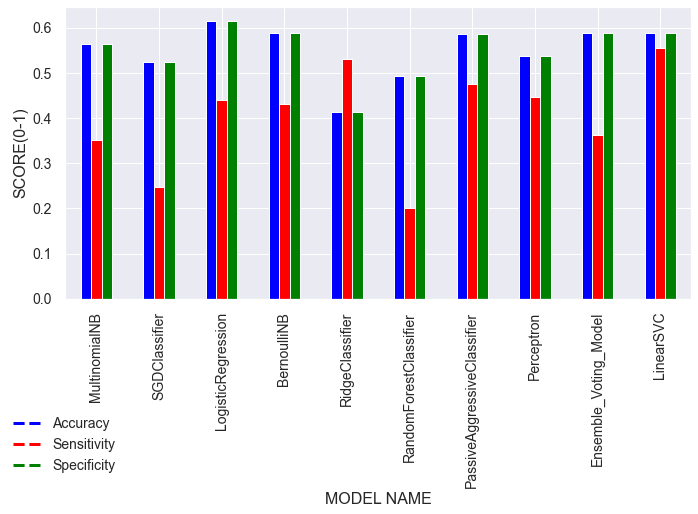

In [23]:
# ploting a bar chart accourding to the perfomence of model
from matplotlib.lines import Line2D
locs = ["upper left", "lower left", "center right"]
ax = result.plot(x="Model", y=["test_accuracy", "test_sensitivity/recall", "test_specificity"], kind="bar",figsize=(10, 5),fontsize=14,color=['blue', 'red', 'green'])
ax.set_xlabel("MODEL NAME",fontsize=16)
ax.set_ylabel("SCORE(0-1)",fontsize=16)
#ax.set_title('Sentiment Analysis Model Comparison',fontsize=20)
#ax.legend(loc=1, bbox_to_anchor=(0.15,0.01))
colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
labels = ['Accuracy', 'Sensitivity', 'Specificity']
plt.legend(lines, labels,loc='center right', bbox_to_anchor=(0.1, -0.5),fontsize=14)
#plt.legend(lines, labels)

# Applying Predication Model
We got logistic regression is a best model so that we use this to predict amazon dataset.

In [24]:
model = LogisticRegression(C = 1.1,random_state=0,solver='saga')

In [25]:
%%time
model.fit(X_train.text_vectorized, y_train)
predict_train = model.predict(X_train.text_vectorized)

Wall time: 2.65 s


In [26]:
#model testing
print("Accuracy:", metrics.accuracy_score(y_train,predict_train))

Accuracy: 0.671676198564976


# Predication Start for Mobile Sentiments

In [27]:
df1 = pd.read_csv('Amazon_Mobile_Reviews_Data.csv')

In [28]:
df1

,Unnamed: 0,Product Id,Mobile,Name,Title,Rating,Text
0,0,B07WZG2YR3,Mi 10,SAIF RAZA,Heating issue,4.0,All are okk but mobile heating problem so high...
1,1,B07WZG2YR3,Mi 10,nitin panwar,Good phone (Pros & Cons simplified),1.0,"Hi guys,In general the phone is nice and does ..."
2,2,B07WZG2YR3,Mi 10,naveen,Worst,4.0,Heating problem.....waste of hard money....go ...
3,3,B07WZG2YR3,Mi 10,Pramod Sawant,found inner box seal tampered,4.0,"outer packaging was intact, but inner box seal..."
4,4,B07WZG2YR3,Mi 10,Amazon Customer,So bad,1.0,Ist very bad
...,...,...,...,...,...,...,...
995,995,B077PWK5BY,OnePlus 8 Pro,Arindam Singh,A great feature rich phone but has Display iss...,1.0,I bought this 12GB+256GB Glacial Green variant...
996,996,B077PWK5BY,OnePlus 8 Pro,MEENAKSHI Goswami,Superb,1.0,Superb phone but little long and curves should...
997,997,B077PWK5BY,OnePlus 8 Pro,Robin Sahni,"Screen issues,Heating issues,Bad front camera",3.0,My oneplus 8 pro has this screen uniformity is...
998,998,B077PWK5BY,OnePlus 8 Pro,Rambabu Karn,Worst phone,5.0,Don't waste your money in this... don't go one...


In [29]:
# drop out some un usefull columns
df1.drop(['Unnamed: 0', 'Product Id','Name'], axis=1, inplace=True)

In [30]:
df1

,Mobile,Title,Rating,Text
0,Mi 10,Heating issue,4.0,All are okk but mobile heating problem so high...
1,Mi 10,Good phone (Pros & Cons simplified),1.0,"Hi guys,In general the phone is nice and does ..."
2,Mi 10,Worst,4.0,Heating problem.....waste of hard money....go ...
3,Mi 10,found inner box seal tampered,4.0,"outer packaging was intact, but inner box seal..."
4,Mi 10,So bad,1.0,Ist very bad
...,...,...,...,...
995,OnePlus 8 Pro,A great feature rich phone but has Display iss...,1.0,I bought this 12GB+256GB Glacial Green variant...
996,OnePlus 8 Pro,Superb,1.0,Superb phone but little long and curves should...
997,OnePlus 8 Pro,"Screen issues,Heating issues,Bad front camera",3.0,My oneplus 8 pro has this screen uniformity is...
998,OnePlus 8 Pro,Worst phone,5.0,Don't waste your money in this... don't go one...


## Amazone Reviews data Preprocessing 

In [31]:
%%time
# Text-preprocessing
print(">>>>>Text-preprocessing<<<<<")
print("========START=========")
# Missing Values
num_missing_desc = df1.isnull().sum()[2]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
data = df1.dropna()
print("Drop NULL values : Done")

TAG_CLEANING_RE = "@\S+"
# Remove @tags
df1['Text'] = df1['Text'].map(lambda x: re.sub(TAG_CLEANING_RE, ' ', x))
print("Remove @tags : Done")

# Smart lowercase
df1['Text'] = df1['Text'].map(lambda x: x.lower())
print("Smart lowercase : Done")

# Remove numbers
df1['Text'] = df1['Text'].map(lambda x: re.sub(r'\d+', ' ', x))
print("Remove numbers : Done")

# Remove links
TEXT_CLEANING_RE = "https?:\S+|http?:\S|[^A-Za-z0-9]+"
df1['Text'] = df1['Text'].map(lambda x: re.sub(TEXT_CLEANING_RE, ' ', x))
print("Remove links : Done")

# Remove Punctuation
df1['Text']  = df1['Text'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
print("Remove Punctuation : Done")

# Remove white spaces
df1['Text'] = df1['Text'].map(lambda x: x.strip())
print("Remove white spaces : Done")

# Tokenize into words
df1['Text'] = df1['Text'].map(lambda x: word_tokenize(x))
print("Tokenize into words : Done")
 
# Remove non alphabetic tokens
df1['Text'] = df1['Text'].map(lambda x: [word for word in x if word.isalpha()])
print("Remove non alphabetic tokens : Done")

# Filter out stop words
stop_words = set(stopwords.words('english'))
df1['Text'] = df1['Text'].map(lambda x: [w for w in x if not w in stop_words])
print("Filter out stop words : Done")
    
# Word Lemmatization
lem = WordNetLemmatizer()
df1['Text'] = df1['Text'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
print("Word Lemmatization : Done")

# Turn lists back to string
df1['Text'] = df1['Text'].map(lambda x: ' '.join(x))
print("Turn lists back to string : Done")

print("========END=========")

>>>>>Text-preprocessing<<<<<
========START=========
Number of missing values: 0
Drop NULL values : Done
Remove @tags : Done
Smart lowercase : Done
Remove numbers : Done
Remove links : Done
Remove Punctuation : Done
Remove white spaces : Done
Tokenize into words : Done
Remove non alphabetic tokens : Done
Filter out stop words : Done
Word Lemmatization : Done
Turn lists back to string : Done
========END=========
Wall time: 769 ms


In [32]:
df1

,Mobile,Title,Rating,Text
0,Mi 10,Heating issue,4.0,okk mobile heat problem high suggest guy plz b...
1,Mi 10,Good phone (Pros & Cons simplified),1.0,hi guy general phone nice manage provide feel ...
2,Mi 10,Worst,4.0,heat problem waste hard money go phone range
3,Mi 10,found inner box seal tampered,4.0,outer package intact inner box seal find break...
4,Mi 10,So bad,1.0,ist bad
...,...,...,...,...
995,OnePlus 8 Pro,A great feature rich phone but has Display iss...,1.0,buy gb gb glacial green variant physically loo...
996,OnePlus 8 Pro,Superb,1.0,superb phone little long curve camera speakers...
997,OnePlus 8 Pro,"Screen issues,Heating issues,Bad front camera",3.0,oneplus pro screen uniformity issue low bright...
998,OnePlus 8 Pro,Worst phone,5.0,waste money go one plus better u buy go series...


In [33]:
# Function for bulk prediction the sentiments
def sentipredictbulk(df):
    result = model.predict(vect.transform(df1['Text']))
    df1['Sentiments'] = label_encoder.inverse_transform(result)
    return df

In [34]:
# applying prediction
df1 = sentipredictbulk(df1)

In [35]:
df1

,Mobile,Title,Rating,Text,Sentiments
0,Mi 10,Heating issue,4.0,okk mobile heat problem high suggest guy plz b...,Netural
1,Mi 10,Good phone (Pros & Cons simplified),1.0,hi guy general phone nice manage provide feel ...,Negative
2,Mi 10,Worst,4.0,heat problem waste hard money go phone range,Negative
3,Mi 10,found inner box seal tampered,4.0,outer package intact inner box seal find break...,Positive
4,Mi 10,So bad,1.0,ist bad,Very Negative
...,...,...,...,...,...
995,OnePlus 8 Pro,A great feature rich phone but has Display iss...,1.0,buy gb gb glacial green variant physically loo...,Negative
996,OnePlus 8 Pro,Superb,1.0,superb phone little long curve camera speakers...,Very Positive
997,OnePlus 8 Pro,"Screen issues,Heating issues,Bad front camera",3.0,oneplus pro screen uniformity issue low bright...,Negative
998,OnePlus 8 Pro,Worst phone,5.0,waste money go one plus better u buy go series...,Very Negative


In [36]:
df1['Sentiments'].value_counts()

Negative         270
Very Positive    230
Netural          190
Positive         190
Very Negative    120
Name: Sentiments, dtype: int64

# We perfoerms some small EDA in sentiments data accourding to there rating and sentiments

### In our first analysis we can clearly se that MI 10 having Highest nagative values and Iphone 11 pro Max have a Highest Posetive sentiments values.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

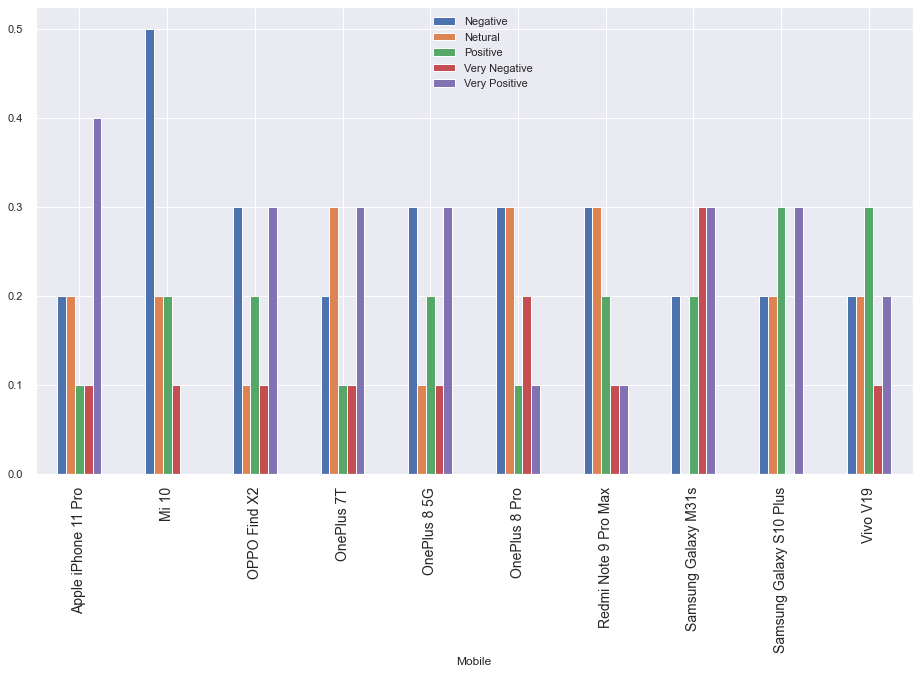

In [37]:
result = df1.groupby(['Sentiments','Mobile'])['Mobile'].count().unstack(0)
# Change this line to plot percentages instead of absolute values
ax = (result.div(result.sum(1), axis=0)).plot(kind='bar',figsize=(14,8))
plt.legend(loc='upper center',bbox_to_anchor=(0.51, 1))

plt.xticks(fontsize=14)

### In our observation from ratinga nd sentiments we found having low rating have a negative sentiments and having high rating has a postive sentimenst

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

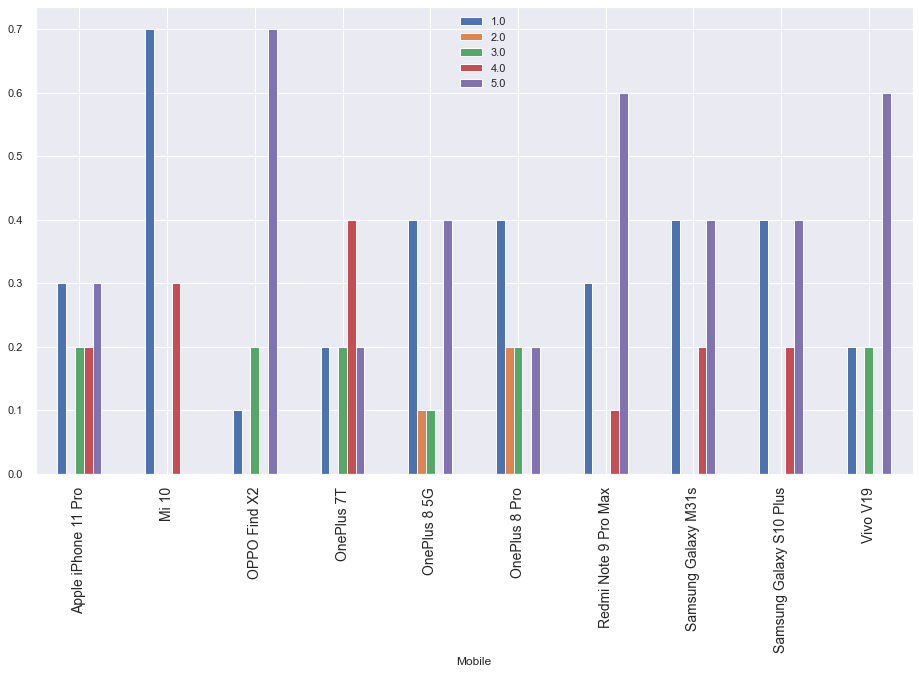

In [38]:
result = df1.groupby(['Rating','Mobile'])['Mobile'].count().unstack(0)
# Change this line to plot percentages instead of absolute values
ax = (result.div(result.sum(1), axis=0)).plot(kind='bar',figsize=(14,8))
plt.legend(loc='upper center',bbox_to_anchor=(0.51, 1))

plt.xticks(fontsize=14)

In [39]:
#Saving Final Sentiment data to the csv file
df1.to_csv(r'Amazon_Mobile_Reviews_Sentiments.csv',index=True)